# INFORME 



<img src="intro.jpg" width="800" />

## Descripción
En este informe se realizará un análisis de reseñas de Amazon diseñadas específicamente para ayudar a la investigación en la clasificación de textos. El conjunto de datos contiene reseñas en español. Cada registro del conjunto de datos contiene el texto de la reseña, el título de la reseña, la calificación por estrellas (1-5) y un revisor anónimo ID, una ID de producto anónima y la categoría de producto.


## Objetivo

El objetivo para este informe final es poder predecir la calificación del producto según las reseñas de los clientes. 
Profundizando el proyecto anterior de PNL, utilizando libreria Texblog para análisis de sentimientos y Redes neuronales convolucionales para la clasificación de multiclases. 


El proyecto anterior se encuentra en: https://github.com/RomiLuna/proyecto4_DS


 **Importación de librerias**

In [1]:
#librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#El módulo itertools incluye un conjunto de funciones para trabajar con conjuntos de datos de secuencia
import itertools

################# NLP #############
import nltk  
from wordcloud import WordCloud  # esto es para la nube de palabras

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


# Importamos esta libreria que nos permite reemplazar caracteres y usar expresiones regulares
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

############Vectorización###############
from sklearn.feature_extraction.text import CountVectorizer

#Transforma una matriz de recuento en una representación tf o tf-idf normalizada
from sklearn.feature_extraction.text import TfidfTransformer

#Convierta una colección de documentos sin procesar en una matriz de funciones TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer


######  Modelos   ##############
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost.sklearn import XGBClassifier

########### Métricas########################
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Importación de los stopwords del español e impresión
stopwords = nltk.corpus.stopwords
stopwords = stopwords.words('spanish')
#stopwords  impresión

# <font color=purple>1.1.1  Exploración de datos y Procesamiento del Lenguaje Natural

## <font color=purple>  Importacion de datos 

In [3]:
dataset = pd.read_json('datos\dataset_es_dev.json', lines=True)
dataset2 = pd.read_json('datos\dataset_es_test.json', lines=True)
dataset3 = pd.read_json('datos\dataset_es_train.json', lines=True)

Vista de los primeros 3 registros de cada dataset

In [4]:
print ("Archico dev:")
dataset.head(3)

Archico dev:


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports


In [5]:
print("Archico test:")
dataset2.head(3)

Archico test:


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy


In [82]:
print ("Archico train:")
dataset3.head(3)

Archico train:


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text length,text length2,titular_lemm,body_lemm,titular_stem,body_stem
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,nada bueno se me fue ka pantalla en menos de 8...,television nevir,es,electronics,94,16,television nevir,bueno ka pantalla menos 8 recibido respuesta f...,televis nevir,bueno ka pantalla meno mese recibido respuesta...
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"horrible, nos tuvimos que comprar otro porque ...",dinero tirado a la basura con esta compra,es,electronics,140,41,dinero tirado basura compra,horrible comprar sabemos inglés informático de...,dinero tirado basura compra,horribl comprar sabemo ingl s inform tico desp...
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117,53,solo llega unidad obligan comprar,obligan comprar do unidades llega solo forma r...,solo llega unidad obligan comprar,obligan comprar do unidad llega solo forma rec...


Descripción del tipo de datos de cada columna para cada dataset

In [7]:
print ("Archico dev:")
dataset.info()

Archico dev:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [8]:
print ("Archico test:")
dataset2.info()

Archico test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [9]:
print ("Archico train:")
dataset3.info()

Archico train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


Descripción Estadística de cada dataset

In [10]:
print ("Archico dev:")
dataset.describe()

Archico dev:


,stars
count,5000.000000
mean,3.000000
std,1.414355
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [11]:
print ("Archico test:")
dataset2.describe()

Archico test:


,stars
count,5000.000000
mean,3.000000
std,1.414355
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [12]:
print("Archico train:")
dataset3.describe()

Archico train:


,stars
count,200000.000000
mean,3.000000
std,1.414217
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Dimensiones de archivos Dev, Test and Train

In [13]:
dataset.shape,dataset2.shape, dataset3.shape,

((5000, 8), (5000, 8), (200000, 8))

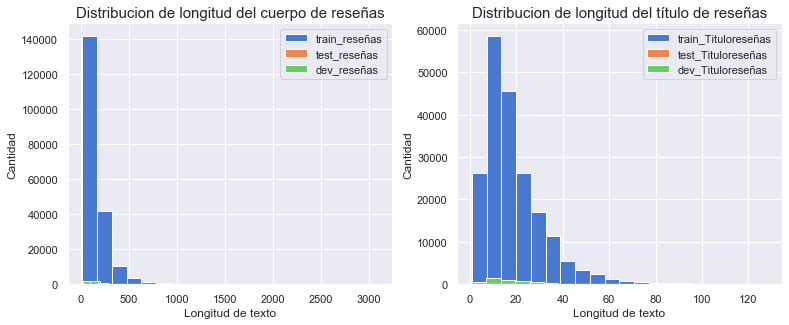

In [14]:
sns.set(context='notebook',style='darkgrid',palette='muted',font='sans-serif',font_scale=1.0)
plt.figure(figsize = (6.4*2,4.8))
plt.subplot(1,2,1)
length_train = dataset3['review_body'].str.len()
length_test = dataset2['review_body'].str.len()
length_dev = dataset['review_body'].str.len()
plt.title('Distribucion de longitud del cuerpo de reseñas',fontdict = {'fontsize': 15,'fontweight' :2, 'verticalalignment': 'baseline'})
plt.hist(length_train, bins=20, label="train_reseñas")
plt.hist(length_test, bins=20, label="test_reseñas")
plt.hist(length_dev, bins=20, label="dev_reseñas")
plt.xlabel('Longitud de texto')
plt.ylabel('Cantidad')
plt.legend()
plt.subplot(1,2,2)
length_train = dataset3['review_title'].str.len()
length_test = dataset2['review_title'].str.len()
length_dev = dataset['review_title'].str.len()
plt.title('Distribucion de longitud del título de reseñas',fontdict = {'fontsize': 15,'fontweight' :2, 'verticalalignment': 'baseline'})
plt.hist(length_train, bins=20, label="train_Tituloreseñas")
plt.hist(length_test, bins=20, label="test_Tituloreseñas")
plt.hist(length_dev, bins=20, label="dev_Tituloreseñas")
plt.xlabel('Longitud de texto')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

Unión de de los archivos

In [4]:
dataset3 = dataset3.append(dataset2, ignore_index=True)
dataset3 = dataset3.append(dataset, ignore_index=True)

dataset3.shape #dimensión de la union

(210000, 8)

In [16]:
#creo nueva columna con la longitud del cuerpo de reseñas para luego graficar
dataset3['text length'] = dataset3['review_body'].apply(len)
#creo nueva columna con la longitud del título de reseñas para luego graficar
dataset3['text length2'] = dataset3['review_title'].apply(len)
dataset3.head(3)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text length,text length2
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,94,16
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,140,41
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117,53


In [17]:
print ("valores faltantes en cada columna:\n",dataset3.isna().sum()) 

valores faltantes en cada columna:
 review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
text length         0
text length2        0
dtype: int64


Visualización de longitud de texto por estrellas del cuerpo de reseñas


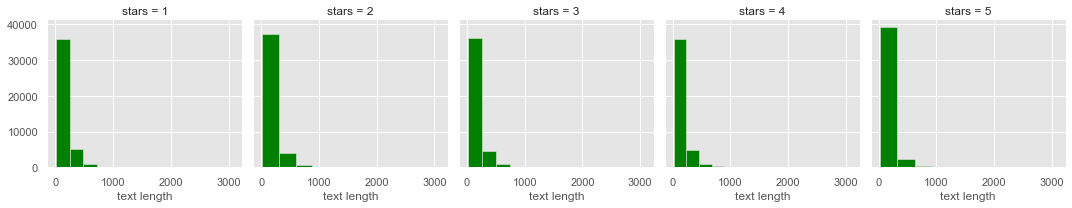

In [18]:
print("Visualización de longitud de texto por estrellas del cuerpo de reseñas")
plt.style.use(['ggplot']) 
g = sns.FacetGrid(dataset3,col='stars')
g.map(plt.hist,'text length',color='green')


Visualización de longitud de texto por estrellas del título de reseñas


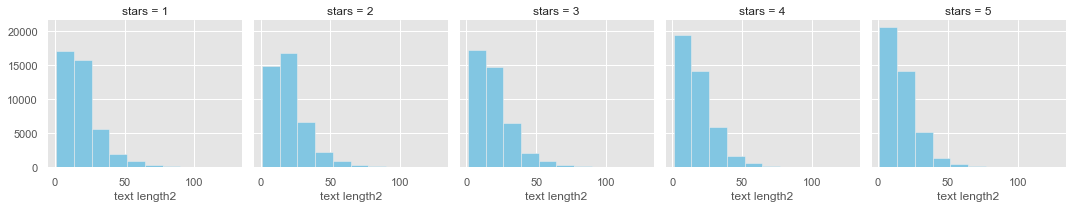

In [19]:
print("Visualización de longitud de texto por estrellas del título de reseñas")
plt.style.use(['ggplot']) 
g = sns.FacetGrid(dataset3,col='stars')
g.map(plt.hist,'text length2',color='c')

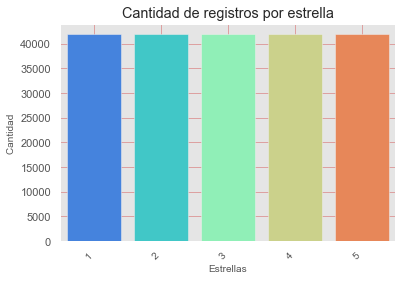

In [20]:
#cantidad de registros por estrellas
#plt.figure(figsize=(3,2),dpi= 110,facecolor='white',edgecolor='white',frameon=True) 
sns.countplot(x='stars',data=dataset3,palette='rainbow')
plt.xlabel('Estrellas' , fontsize=10)
plt.ylabel('Cantidad ', fontsize=10)
plt.xticks(rotation=45 , ha='right', fontsize=10)
#plt.legend(loc='upper left' ,title = 'Cantidad de registros por estrella', bbox_to_anchor=(1, 1), fontsize=10)
plt.title('Cantidad de registros por estrella')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

Nota: Vemos que nuestras clases estan balanceadas

In [21]:
#Promedio de longitud de texto agrupados por estrellas
dataset3.groupby('stars').mean()


,text length,text length2
stars,,
1,152.947762,19.651190
2,168.251524,20.730214
3,155.310333,19.637905
4,142.507452,18.313000
5,137.442929,17.516048


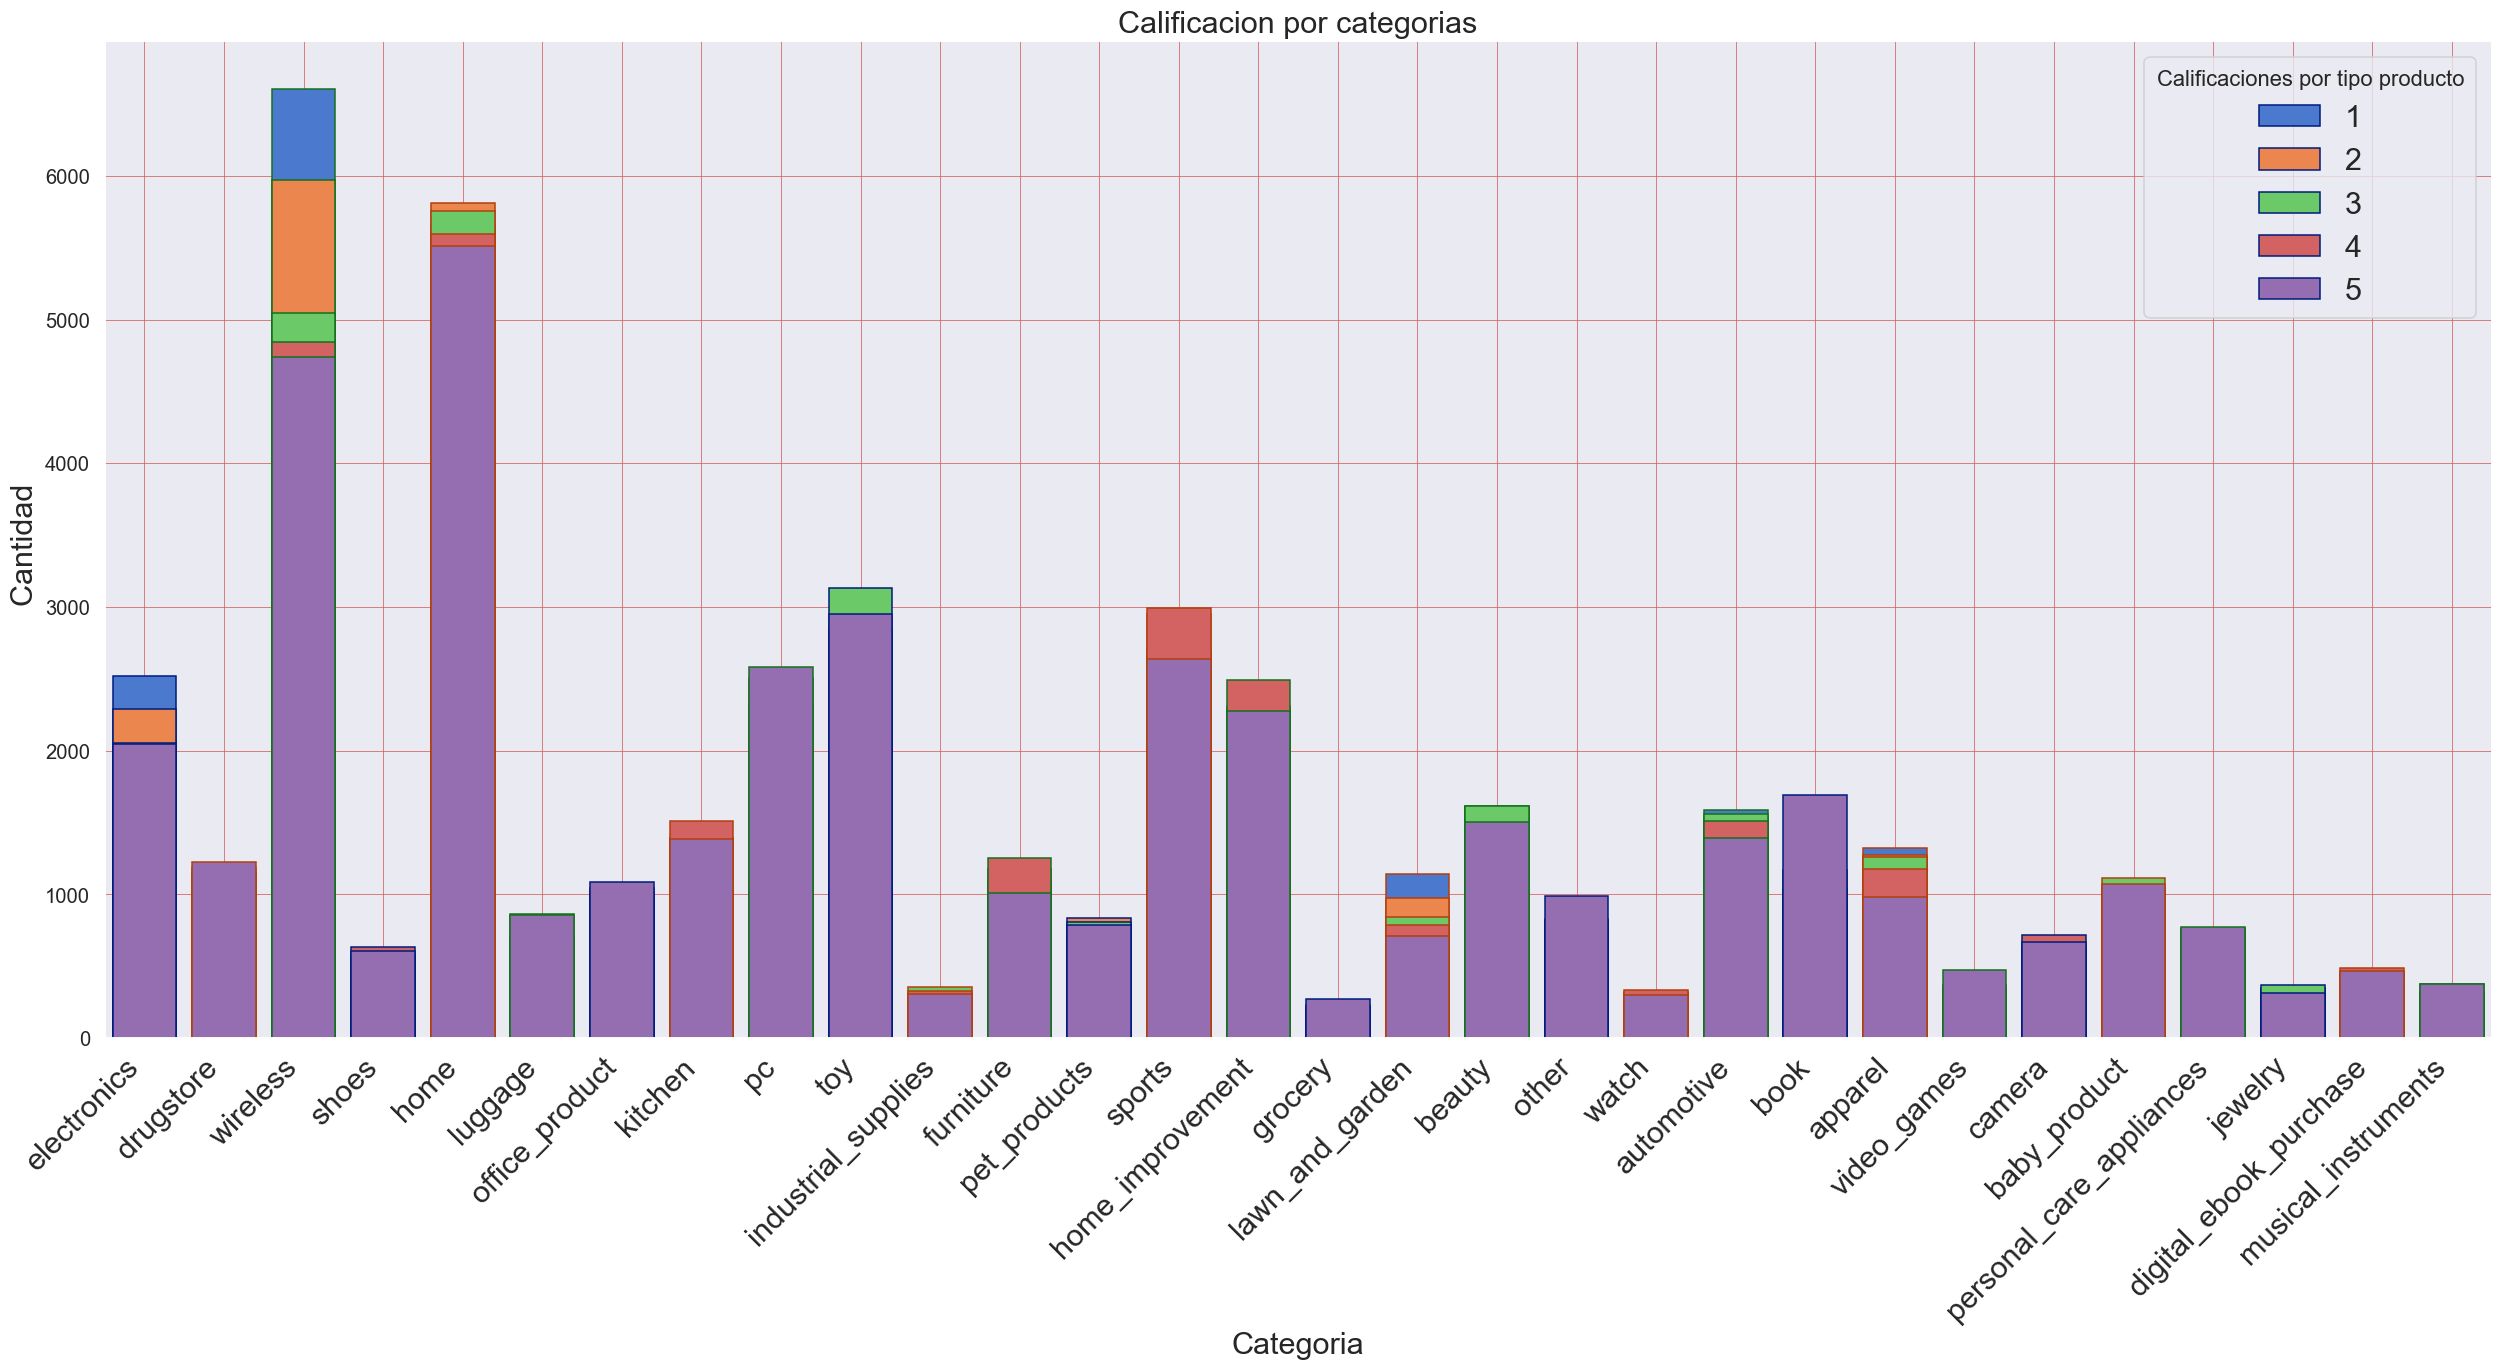

In [22]:
plt.figure(figsize=(28,12),dpi= 110,facecolor='white',edgecolor='white',frameon=True)    # Cambio el tamaño para que sea legible
sns.set(context='notebook',style='darkgrid',palette='muted',font='sans-serif',font_scale=1.2)
ax = sns.countplot(x="product_category", hue= "stars", data=dataset3,saturation=0.95,linewidth=1,edgecolor=sns.color_palette("dark", 3), dodge = False)
plt.title('Calificacion por categorias',fontdict = {'fontsize': 20,'fontweight' :3, 'verticalalignment': 'baseline'})
plt.xlabel('Categoria' , fontsize=20)
plt.ylabel('Cantidad ', fontsize=20)
plt.xticks(rotation=45 , ha='right', fontsize=20)
plt.legend(loc='upper right' ,title = 'Calificaciones por tipo producto', bbox_to_anchor=(1, 1), fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

In [23]:
#convierto las palabras a minúsculas
dataset3=dataset3.apply(lambda x: x.str.lower() if x.dtype == "object" else x)  

## <font color=purple> Palabras asociadas a calificaciones positivas

In [24]:
#se crea un dataset con los registros de mayor estrella 
dataset3_mayorEstrella = dataset3[dataset3.stars>=4]
dataset3_mayorEstrella.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text length,text length2
120000,es_0006073,product_es_0989772,reviewer_es_0335919,4,"tiene buena pinta, veremos el resultado",calidad,es,sports,39,7
120001,es_0044521,product_es_0630397,reviewer_es_0209480,4,entrega rápida como siempre pero falta factura,falta factura,es,wireless,46,13
120002,es_0362587,product_es_0727421,reviewer_es_0620388,4,está bien y envío rápido,bueno,es,pc,24,5
120003,es_0483689,product_es_0983132,reviewer_es_0298104,4,"queda muy bien, material duradero y tamaño per...",material duradero,es,home,51,17
120004,es_0729676,product_es_0903356,reviewer_es_0104192,4,genial aunque huele mucho a pegamento,buena,es,personal_care_appliances,37,5


In [8]:
#Vamos a definir una función para traducir estas etiquetas a los valores de POS que entiende `wordnet_lemmatizer`.
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [26]:
# Se carga en listas las palabras normalizadas tanto para el cuerpo de reseñas como para el título
todas_reseñas_mayorestrella = []
todos_titulos_mayorestrella = []
for i in range(dataset3_mayorEstrella.shape[0]):
    # Se selecciona el cuerpo de la reseña
    reseña = dataset3_mayorEstrella.iloc[i].review_body
    # pasar de un único string de texto a una lista de strings de oraciones.
    reseña = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(reseña)

    # Eliminamos las palabras de menos de 3 letras
    reseña = [palabra for palabra in reseña if len(palabra) > 2]
    # se saca las stopwords
    reseña = [word for word in reseña if word not in stopwords]

    # Se selecciona el título de la reseña
    titulo = dataset3_mayorEstrella.iloc[i].review_title
    # pasar de un único string de texto a una lista de strings de oraciones.
    titulo = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titulo)

    # Eliminamos las palabras de menos de 3 letras
    titulo = [palabra for palabra in titulo if len(palabra) > 3]
    # se saca las stopwords
    titulo = [word for word in titulo if word not in stopwords]

    todos_titulos_mayorestrella.append(titulo)
    todas_reseñas_mayorestrella.append(reseña)

In [27]:
# Esta celda convierte una lista de listas en una unica lista para el cuerpo de las reseñas
todas_reseñas_mayorestrella = list(itertools.chain(*todas_reseñas_mayorestrella))
todas_reseñas_mayorestrella


['buena',
 'pinta',
 'veremos',
 'resultado',
 'entrega',
 'rápida',
 'siempre',
 'falta',
 'factura',
 'bien',
 'envío',
 'rápido',
 'queda',
 'bien',
 'material',
 'duradero',
 'tamaño',
 'perfecto',
 'genial',
 'aunque',
 'huele',
 'pegamento',
 'llega',
 'eliminar',
 'todas',
 'manchas',
 'espera',
 'buena',
 'calidad',
 'plástico',
 'regulero',
 'parece',
 'romper',
 'rajar',
 'enseguida',
 'veremos',
 'demás',
 'fácil',
 'instalación',
 'funciona',
 'perfectamente',
 'momento',
 'contenta',
 'compra',
 'barato',
 'hace',
 'ocupen',
 'lavabo',
 'casas',
 'pequeñas',
 'importante',
 'gafas',
 'cómodas',
 'apariencia',
 'robusta',
 'estética',
 'actual',
 'menos',
 'espalda',
 'goma',
 'eva',
 'demás',
 'bien',
 'aunque',
 'hombreras',
 'viene',
 'ponerse',
 'así',
 'bien',
 'gusta',
 'hijo',
 'pared',
 'escritorio',
 'organización',
 'estudiar',
 'toque',
 'elegante',
 'además',
 'práctico',
 'adornar',
 'algún',
 'rinconcito',
 'enchufe',
 'encantado',
 'sólo',
 'encuentro',
 'fal

In [28]:
# Esta celda convierte una lista de listas en una unica lista para el titulo de las reseñas
todos_titulos_mayorestrella = list(itertools.chain(*todos_titulos_mayorestrella))
todos_titulos_mayorestrella

['calidad',
 'falta',
 'factura',
 'bueno',
 'material',
 'duradero',
 'buena',
 'deja',
 'buen',
 'olor',
 'opinión',
 'tener',
 'bien',
 'aislado',
 'ordenados',
 'cepillos',
 'pastas',
 'calidad',
 'precio',
 'coderas',
 'hombreras',
 'plástico',
 'duro',
 'bien',
 'bien',
 'tapones',
 'útil',
 'útil',
 'realmente',
 'absorbe',
 'humedad',
 'precio',
 'tuerca',
 'mejorable',
 'accesorios',
 'imprescindibles',
 'bien',
 'correcto',
 'taloneras',
 'alargador',
 'charo',
 'balido',
 'bueno',
 'buen',
 'acabado',
 'producto',
 'igual',
 'foto',
 'descripción',
 'buen',
 'producto',
 'buena',
 'compra',
 'bueno',
 'precio',
 'adecuada',
 'pido',
 'unidades',
 'solo',
 'llega',
 'llegará',
 'entiendo',
 'perfecto',
 'mesa',
 'comedor',
 'satisfactorio',
 'buena',
 'compra',
 'calidad',
 'materiales',
 'sencillo',
 'funcional',
 'buena',
 'compra',
 'buena',
 'placa',
 'calidad',
 'precio',
 'montaje',
 'lleva',
 'tiempo',
 'buen',
 'precio',
 'funcionamiento',
 'bueno',
 'bueno',
 'bonito

In [29]:
#FreqDist para las frecuencias de las palabras del cuerpo de las reseñas
freq_reseñas_mayorestrella = nltk.FreqDist(todas_reseñas_mayorestrella)
freq_reseñas_mayorestrella 

FreqDist({'bien': 24790, 'calidad': 16518, 'buena': 13769, 'precio': 13555, 'producto': 9254, 'buen': 8452, 'perfecto': 7715, 'bastante': 6390, 'perfectamente': 5086, 'cumple': 4911, ...})

In [30]:
#FreqDist para las frecuencias de las palabras del titulo de las reseñas
freq_titulos_mayorestrella = nltk.FreqDist(todos_titulos_mayorestrella)
freq_titulos_mayorestrella 

FreqDist({'buena': 8222, 'calidad': 8125, 'bien': 6315, 'buen': 6165, 'precio': 6079, 'perfecto': 4134, 'producto': 3868, 'compra': 2579, 'bueno': 2166, 'cumple': 1829, ...})

In [31]:
#frecuencia de palabras del cuerpo de reseñas
df3_mayorEstrella = pd.DataFrame(freq_reseñas_mayorestrella.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_mayorEstrella.sort_values('Frequency',inplace=True,ascending=False)
df3_mayorEstrella.head()

,word,Frequency
9,bien,24790
26,calidad,16518
0,buena,13769
102,precio,13555
149,producto,9254


In [32]:
#frecuencia de palabras del titulo de reseñas
df3_mayorEstrellatitulo = pd.DataFrame(freq_titulos_mayorestrella.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_mayorEstrellatitulo.sort_values('Frequency',inplace=True,ascending=False)
df3_mayorEstrellatitulo.head()

,word,Frequency
6,buena,8222
0,calidad,8125
12,bien,6315
8,buen,6165
17,precio,6079


### Visualización de las palabras con sus frecuencias

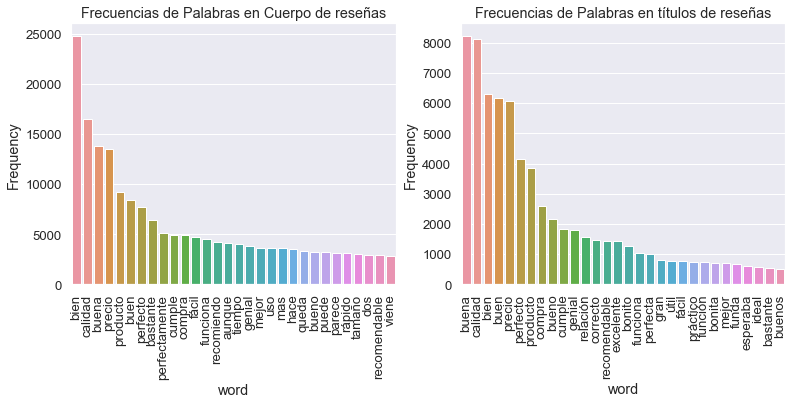

In [33]:
plt.figure(figsize = (6.4*2,4.8))
plt.subplot(1,2,1)
sns.barplot(x=df3_mayorEstrella.iloc[:30].word,
            y=df3_mayorEstrella.iloc[:30].Frequency )

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en Cuerpo de reseñas")

plt.subplot(1,2,2)
sns.barplot(x=df3_mayorEstrellatitulo.iloc[:30].word,
            y=df3_mayorEstrellatitulo.iloc[:30].Frequency)

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en títulos de reseñas")
plt.show()

### visualización de la nube de palabras para las reseñas con mayor estrella

(-0.5, 799.5, 499.5, -0.5)

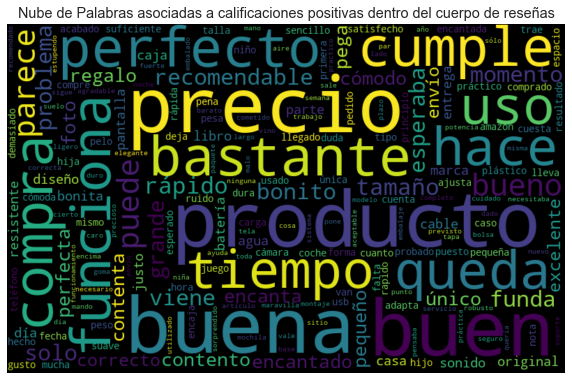

In [34]:
# palapras de cuerpo de reseñas
all_words = ' '.join([text for text in df3_mayorEstrella['word']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                      max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras asociadas a calificaciones positivas dentro del cuerpo de reseñas" )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

### visualización de la nube de palabras para título con mayor estrella

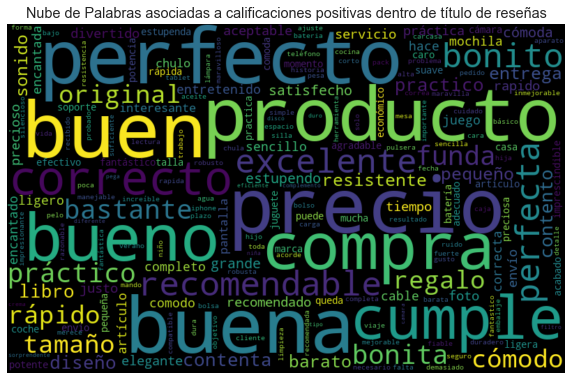

In [35]:
# palapras de título de reseñas
all_words2 = ' '.join([text for text in df3_mayorEstrellatitulo['word']])
wordcloud2 = WordCloud(width=800, height=500, random_state=21,
                       max_font_size=110).generate(all_words2)
plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras asociadas a calificaciones positivas dentro de título de reseñas")
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')

plt.show()

## <font color=purple> Palabras asociadas a calificaciones Negativas

In [36]:
#se crea un dataset con los registros de mayor menor estrella 
dataset3_menorEstrella = dataset3[dataset3.stars==1]
dataset3_menorEstrella.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text length,text length2
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,nada bueno se me fue ka pantalla en menos de 8...,television nevir,es,electronics,94,16
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"horrible, nos tuvimos que comprar otro porque ...",dinero tirado a la basura con esta compra,es,electronics,140,41
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117,53
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"no entro en descalificar al vendedor, solo pue...",producto no recibido.,es,wireless,332,21
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,llega tarde y co la talla equivocada,devuelto,es,shoes,36,8


In [37]:
# Se carga en listas las palabras normalizadas
# esta lista será para las palabras que se encuentran en el cuerpo de las reseñas
todas_reseñas_menorEstrella = []
# esta lista será para las palabras que se encuentran en el título
todos_titulos_menorEstrella = []
for i in range(dataset3_menorEstrella.shape[0]):
    # Se selecciona el cuerpo de la reseña
    reseña = dataset3_menorEstrella.iloc[i].review_body
    # pasar de un único string de texto a una lista de strings de oraciones.
    reseña = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(reseña)
    # Eliminamos las palabras de menos de 3 letras
    reseña = [palabra for palabra in reseña if len(palabra) >= 3]
    # se saca las stopwords
    reseña = [word for word in reseña if word not in stopwords]

    # Se selecciona el título de la reseña
    titulo = dataset3_menorEstrella.iloc[i].review_title
    # pasar de un único string de texto a una lista de strings de oraciones.
    titulo = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titulo)
    # Eliminamos las palabras de menos de 3 letras
    titulo = [palabra for palabra in titulo if len(palabra) >= 3]
    # se saca las stopwords
    titulo = [word for word in titulo if word not in stopwords]

    todos_titulos_menorEstrella.append(titulo)
    todas_reseñas_menorEstrella.append(reseña)

In [38]:
# Esta celda convierte una lista de listas en una unica lista para el cuerpo de las reseñas
todas_reseñas_menorEstrella = list(itertools.chain(*todas_reseñas_menorEstrella))
todas_reseñas_menorEstrella

['bueno',
 'pantalla',
 'menos',
 'meses',
 'recibido',
 'respuesta',
 'fabricante',
 'horrible',
 'comprar',
 'sabemos',
 'inglés',
 'informático',
 'después',
 'hora',
 'capaz',
 'instalarlo',
 'obligan',
 'comprar',
 'dos',
 'unidades',
 'llega',
 'solo',
 'forma',
 'reclamar',
 'autentica',
 'estafa',
 'compreis',
 'entro',
 'descalificar',
 'vendedor',
 'solo',
 'puedo',
 'decir',
 'tras',
 'dos',
 'meses',
 'espera',
 'sigo',
 'producto',
 'contactar',
 'amazon',
 'reclamar',
 'reembolso',
 'amazon',
 'hace',
 'cargo',
 'problema',
 'desembolsado',
 'dinero',
 'dos',
 'meses',
 'devuelven',
 'perdida',
 'tiempo',
 'total',
 'palabras',
 'ustedes',
 'deciden',
 'llega',
 'tarde',
 'talla',
 'equivocada',
 'jamás',
 'llegó',
 'vendedor',
 'nunca',
 'contacto',
 'conmigo',
 'pesar',
 'intentarlo',
 'veces',
 'paraguas',
 'mala',
 'calidad',
 'sensación',
 'romper',
 'abres',
 'cutre',
 'devolverla',
 'ser',
 'triangular',
 'agarra',
 'forma',
 'cómoda',
 'escritura',
 'bonita',
 'ca

In [39]:
# Esta celda convierte una lista de listas en una unica lista para el titulo de las reseñas
todos_titulos_menorEstrella = list(itertools.chain(*todos_titulos_menorEstrella))
todos_titulos_menorEstrella

['television',
 'nevir',
 'dinero',
 'tirado',
 'basura',
 'compra',
 'solo',
 'llega',
 'unidad',
 'obligan',
 'comprar',
 'dos',
 'producto',
 'recibido',
 'devuelto',
 'jamás',
 'llegó',
 'horroroso',
 'funcional',
 'llego',
 'mala',
 'calidad',
 'defectuoso',
 'mala',
 'descripción',
 'saltan',
 'plomos',
 'utilizarla',
 'pegamento',
 'pesimo',
 'mariposa',
 'retuerce',
 'roto',
 'recomendable',
 'ojalá',
 'acuerden',
 'demasiado',
 'fragil',
 'cristina',
 'avería',
 'segundo',
 'día',
 'parece',
 'buena',
 'calidad',
 'información',
 'internet',
 'despues',
 'meses',
 'apenas',
 'uso',
 'hundiendo',
 'material',
 'malo',
 'llego',
 'nunca',
 'dejado',
 'funcionar',
 'descontento',
 'mal',
 'pilar',
 'cápsulas',
 'reutilizables',
 'inútiles',
 'inútil',
 'estafa',
 'suponía',
 'producto',
 'prime',
 'merece',
 'pena',
 'llegado',
 'todavía',
 'llegado',
 'bajisima',
 'calidad',
 'grill',
 'malo',
 'agujero',
 'rellenar',
 'piñata',
 'fatal',
 'envío',
 'peores',
 'protectores',
 'p

In [40]:
#FreqDist para las frecuencias de las palabras del cuerpo de las reseñas
freq_reseñas_menorEstrella = nltk.FreqDist(todas_reseñas_menorEstrella)
freq_reseñas_menorEstrella 

FreqDist({'producto': 7611, 'bien': 4668, 'calidad': 4539, 'llegado': 3560, 'dos': 3520, 'mal': 2987, 'recomiendo': 2973, 'amazon': 2895, 'mala': 2713, 'funciona': 2708, ...})

In [41]:
#FreqDist para las frecuencias de las palabras del titulo de las reseñas
freq_titulos_menorEstrella = nltk.FreqDist(todos_titulos_menorEstrella)
freq_titulos_menorEstrella 

FreqDist({'calidad': 2538, 'mala': 2316, 'producto': 1906, 'mal': 1784, 'funciona': 1313, 'malo': 885, 'llegado': 859, 'recomiendo': 738, 'recibido': 705, 'nunca': 647, ...})

In [42]:
#frecuencia de palabras del cuerpo de reseñas
df3_menorEstrella = pd.DataFrame(freq_reseñas_menorEstrella.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_menorEstrella.sort_values('Frequency',inplace=True,ascending=False)
df3_menorEstrella.head()

,word,Frequency
34,producto,7611
91,bien,4668
63,calidad,4539
309,llegado,3560
17,dos,3520


In [43]:
#frecuencia de palabras del titulo de reseñas
df3_menorEstrellatitulo = pd.DataFrame(freq_titulos_menorEstrella.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_menorEstrellatitulo.sort_values('Frequency',inplace=True,ascending=False)
df3_menorEstrellatitulo.head()

,word,Frequency
21,calidad,2538
20,mala,2316
12,producto,1906
56,mal,1784
159,funciona,1313


### Visualización de las palabras con sus frecuencias

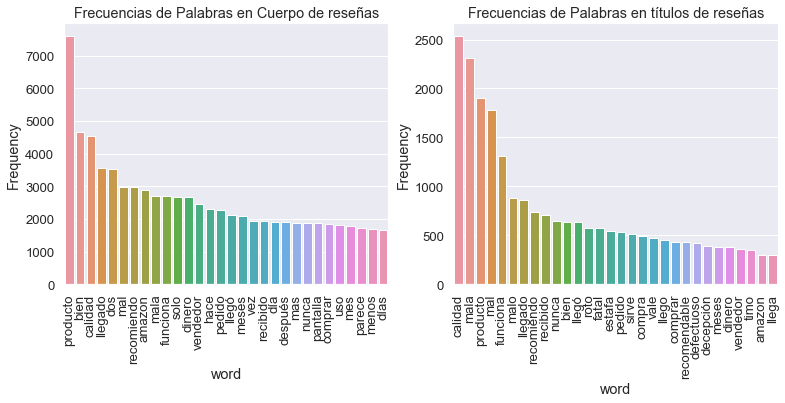

In [44]:
plt.figure(figsize = (6.4*2,4.8))
plt.subplot(1,2,1)
sns.barplot(x=df3_menorEstrella.iloc[:30].word,
            y=df3_menorEstrella.iloc[:30].Frequency )

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en Cuerpo de reseñas")

plt.subplot(1,2,2)
sns.barplot(x=df3_menorEstrellatitulo.iloc[:30].word,
            y=df3_menorEstrellatitulo.iloc[:30].Frequency)

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en títulos de reseñas")
plt.show()

### Visualización de Nube de Palabras de Cuerpo de Reseñas

(-0.5, 799.5, 499.5, -0.5)

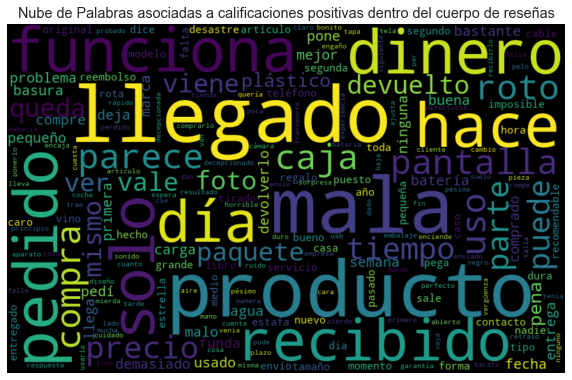

In [45]:
# palapras de cuerpo de reseñas
all_words = ' '.join([text for text in df3_menorEstrella['word']])
wordcloud = WordCloud(width=800, height=500, random_state=21,
                      max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras asociadas a calificaciones positivas dentro del cuerpo de reseñas" )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

### Visualización de Nube de Palabras para el Título de Reseñas

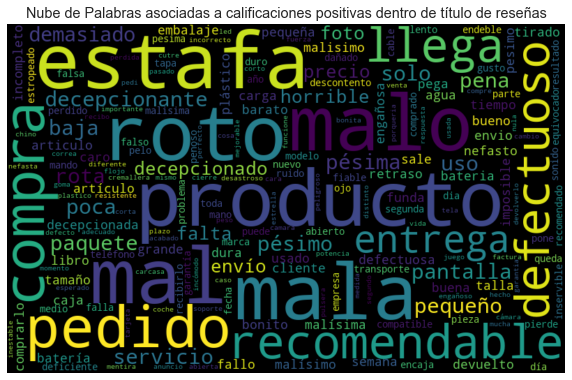

In [46]:
# palapras de título de reseñas
all_words2 = ' '.join([text for text in df3_menorEstrellatitulo['word']])
wordcloud2 = WordCloud(width=800, height=500, random_state=21,
                       max_font_size=110).generate(all_words2)
plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras asociadas a calificaciones positivas dentro de título de reseñas")
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')

plt.show()

## <font color=purple> Palabras de todo el dataset

In [47]:
# Se carga en listas las palabras normalizadas tanto para el cuerpo de reseñas como para el título
todas_reseñas = []
todos_titulos = []
for i in range(dataset3.shape[0]):
    # Se selecciona el cuerpo de la reseña
    reseña = dataset3.iloc[i].review_body
    # pasar de un único string de texto a una lista de strings de oraciones.
    reseña = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(reseña)

    # Eliminamos las palabras de menos de 3 letras
    reseña = [palabra for palabra in reseña if len(palabra) > 2]
    # se saca las stopwords
    reseña = [word for word in reseña if word not in stopwords]

    # Se selecciona el título de la reseña
    titulo = dataset3.iloc[i].review_title
    # pasar de un único string de texto a una lista de strings de oraciones.
    titulo = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titulo)

    # Eliminamos las palabras de menos de 3 letras
    titulo = [palabra for palabra in titulo if len(palabra) > 3]
    # se saca las stopwords
    titulo = [word for word in titulo if word not in stopwords]

    todos_titulos.append(titulo)
    todas_reseñas.append(reseña)

In [48]:
# Esta celda convierte una lista de listas en una unica lista para el titulo de las reseñas
todas_palabras_t = list(itertools.chain(*todos_titulos)) 
todas_palabras_t

['television',
 'nevir',
 'dinero',
 'tirado',
 'basura',
 'compra',
 'solo',
 'llega',
 'unidad',
 'obligan',
 'comprar',
 'producto',
 'recibido',
 'devuelto',
 'jamás',
 'llegó',
 'horroroso',
 'funcional',
 'llego',
 'mala',
 'calidad',
 'defectuoso',
 'mala',
 'descripción',
 'saltan',
 'plomos',
 'utilizarla',
 'pegamento',
 'pesimo',
 'mariposa',
 'retuerce',
 'roto',
 'recomendable',
 'ojalá',
 'acuerden',
 'demasiado',
 'fragil',
 'cristina',
 'avería',
 'segundo',
 'parece',
 'buena',
 'calidad',
 'información',
 'internet',
 'despues',
 'meses',
 'apenas',
 'hundiendo',
 'material',
 'malo',
 'llego',
 'nunca',
 'dejado',
 'funcionar',
 'descontento',
 'pilar',
 'cápsulas',
 'reutilizables',
 'inútiles',
 'inútil',
 'estafa',
 'suponía',
 'producto',
 'prime',
 'merece',
 'pena',
 'llegado',
 'todavía',
 'llegado',
 'bajisima',
 'calidad',
 'grill',
 'malo',
 'agujero',
 'rellenar',
 'piñata',
 'fatal',
 'envío',
 'peores',
 'protectores',
 'puedes',
 'montar',
 'junta',
 'p

In [49]:
# Esta celda convierte una lista de listas en una unica lista para el titulo de las reseñas
todas_palabras_r = list(itertools.chain(*todas_reseñas)) 
todas_palabras_r

['bueno',
 'pantalla',
 'menos',
 'meses',
 'recibido',
 'respuesta',
 'fabricante',
 'horrible',
 'comprar',
 'sabemos',
 'inglés',
 'informático',
 'después',
 'hora',
 'capaz',
 'instalarlo',
 'obligan',
 'comprar',
 'dos',
 'unidades',
 'llega',
 'solo',
 'forma',
 'reclamar',
 'autentica',
 'estafa',
 'compreis',
 'entro',
 'descalificar',
 'vendedor',
 'solo',
 'puedo',
 'decir',
 'tras',
 'dos',
 'meses',
 'espera',
 'sigo',
 'producto',
 'contactar',
 'amazon',
 'reclamar',
 'reembolso',
 'amazon',
 'hace',
 'cargo',
 'problema',
 'desembolsado',
 'dinero',
 'dos',
 'meses',
 'devuelven',
 'perdida',
 'tiempo',
 'total',
 'palabras',
 'ustedes',
 'deciden',
 'llega',
 'tarde',
 'talla',
 'equivocada',
 'jamás',
 'llegó',
 'vendedor',
 'nunca',
 'contacto',
 'conmigo',
 'pesar',
 'intentarlo',
 'veces',
 'paraguas',
 'mala',
 'calidad',
 'sensación',
 'romper',
 'abres',
 'cutre',
 'devolverla',
 'ser',
 'triangular',
 'agarra',
 'forma',
 'cómoda',
 'escritura',
 'bonita',
 'ca

In [50]:
#FreqDist para las frecuencias de todas las palabras del título de las reseñas
freq_palabras_t = nltk.FreqDist(todas_palabras_t)
freq_palabras_t 

FreqDist({'calidad': 16416, 'bien': 12503, 'buena': 10481, 'precio': 9039, 'buen': 7993, 'producto': 7777, 'perfecto': 4442, 'mala': 4218, 'funciona': 3667, 'compra': 3554, ...})

In [51]:
#FreqDist para las frecuencias de todas las palabras del título de las reseñas
freq_palabras_r = nltk.FreqDist(todas_palabras_r)
freq_palabras_r 

FreqDist({'bien': 54174, 'calidad': 33526, 'producto': 25869, 'precio': 24154, 'buena': 20402, 'bastante': 13591, 'dos': 11840, 'buen': 11739, 'funciona': 11597, 'mas': 10631, ...})

In [52]:
#frecuencia de palabras del cuerpo de reseñas
df3_t = pd.DataFrame(freq_palabras_t.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_t.sort_values('Frequency',inplace=True,ascending=False)
df3_t.head()

,word,Frequency
20,calidad,16416
406,bien,12503
40,buena,10481
493,precio,9039
838,buen,7993


In [53]:
#frecuencia de palabras del cuerpo de reseñas
df3_r = pd.DataFrame(freq_palabras_r.items(),columns=['word','Frequency'])
# ordenar por frecuencia
df3_r.sort_values('Frequency',inplace=True,ascending=False)
df3_r.head()

,word,Frequency
91,bien,54174
63,calidad,33526
34,producto,25869
75,precio,24154
524,buena,20402


### Visualización de las palabras con sus frecuencias

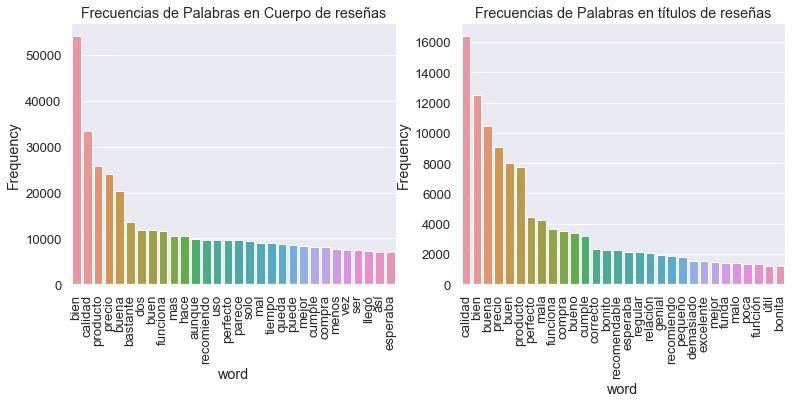

In [54]:
plt.figure(figsize = (6.4*2,4.8))
plt.subplot(1,2,1)
sns.barplot(x=df3_r.iloc[:30].word,
            y=df3_r.iloc[:30].Frequency )

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en Cuerpo de reseñas")

plt.subplot(1,2,2)
sns.barplot(x=df3_t.iloc[:30].word,
            y=df3_t.iloc[:30].Frequency)

plt.xticks(rotation=90)
plt.title("Frecuencias de Palabras en títulos de reseñas")
plt.show()

### Visualización de Nube de palabras 

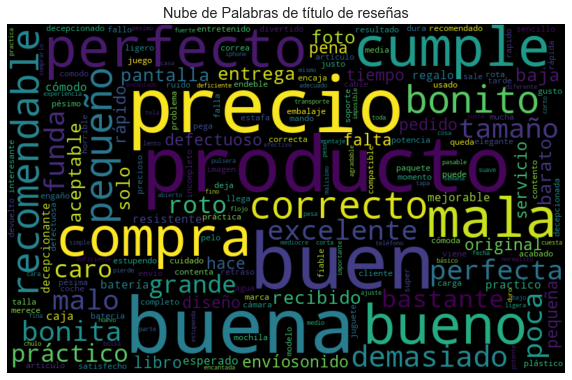

In [55]:
# palapras de título de reseñas
all_words3 = ' '.join([text for text in df3_t['word']])
wordcloud3 = WordCloud(width=800, height=500, random_state=21,
                       max_font_size=110).generate(all_words3)
plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras de título de reseñas")
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis('off')

plt.show()

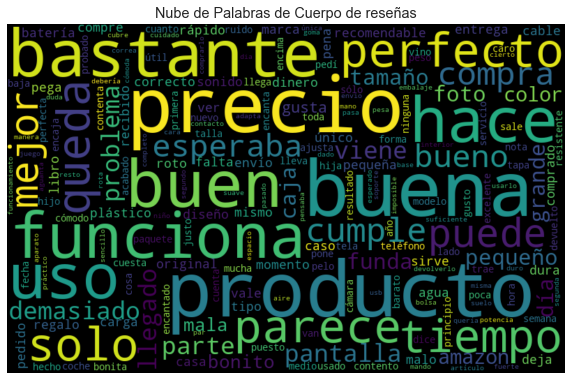

In [56]:
# palapras de cuerpo de reseñas
all_words3 = ' '.join([text for text in df3_r['word']])
wordcloud3 = WordCloud(width=800, height=500, random_state=21,
                       max_font_size=110).generate(all_words3)
plt.figure(figsize=(10, 7))
plt.title("Nube de Palabras de Cuerpo de reseñas")
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis('off')

plt.show()

## <font color=purple> Transformar palabras a raiz

voy a probar usando lemmatizer para tranformar a raiz la palabras

In [57]:
# Se carga en listas las palabras normalizadas del campo titulo
titular_list2 = []

for titular in dataset3.review_title:  # probando con el cuerpo de reseñas
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    #titular = re.sub("[^a-zA-Z]", " ", str(titular)) #saque esta linea porque me sacaba los acentos y me cortaba las palabras

    # Pasamos todo a minúsculas
    titular = titular.lower()

    # Tokenizamos para separar las palabras
    #titular = nltk.word_tokenize(titular)
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)

    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    titular = [wordnet_lemmatizer.lemmatize(
        w, get_wordnet_pos(w)) for w in titular]

    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]

    # Eliminamos las palabras d emenos de 3 letras
    titular = [palabra for palabra in titular if len(palabra) > 3]
    # Por ultimo volvemos a unir el titular
    titular = " ".join(titular)

    # dataset["titular_normalizado"] = titular_list
    titular_list2.append(titular)

In [58]:
# Se carga en listas las palabras normalizadas del campo body
body_list = []

for body in dataset3.review_body:  # probando con el cuerpo de reseñas
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    #body = re.sub("[^a-zA-Z]", " ", str(body))
    
    # Pasamos todo a minúsculas
    body = body.lower()
    # Tokenizamos para separar las palabras

    #body = nltk.word_tokenize(body)
    body = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(body)
   
    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    body = [wordnet_lemmatizer.lemmatize(
        w, get_wordnet_pos(w)) for w in body]

    # Sacamos las Stopwords
    body = [palabra for palabra in body if not palabra in stopwords]

    # Eliminamos las palabras d emenos de 3 letras
    body = [palabra for palabra in body if len(body) > 3]

    # Por ultimo volvemos a unir el titular
    body = " ".join(body)

    # dataset["titular_normalizado"] = titular_list
    body_list.append(body)

In [59]:
#agrega columna con el título normalizado
dataset3["titular_lemm"] = titular_list2


In [60]:
#agrega columna con el cuerpo de reseñas normalizado
dataset3["body_lemm"] = body_list


In [61]:
datos_aRaiz=dataset3[['stars','review_body','review_title','titular_lemm','body_lemm']]
datos_aRaiz.tail(15)

,stars,review_body,review_title,titular_lemm,body_lemm
209985,5,"algo más pequeño que en la foto. no obstante, ...",aceptable y barato.,aceptable barato,pequeño foto obstante parece igual buena muest...
209986,5,la utilizo básicamente para hacer mahonesa y p...,recomendable,recomendable,utilizo básicamente hacer mahonesa picar tomat...
209987,5,"mi hijo está como loco, tiene la bici más molo...",nos ha gustado mucho,gustado,hijo loco bici molona barrio encanta pueda car...
209988,5,"mi chico está encantado con los dos, no pesan,...",encantada.,encantada,chico encantado do pesan molestan
209989,5,muy muy potente .... demasiado para utilizar e...,súper potente,súper potente,potente demasiado utilizar pizarra ojo
209990,5,corrige la postura que da gusto. al principio ...,10/10 para una postura correcta,postura correcta,corrige postura da gusto principio puede resul...
209991,5,estoy muy contenta con la compra.,perfecta,perfecta,
209992,5,lo que esperaba de roca,excelente,excelente,
209993,5,en pedidos todo calidad y llegando muy pronto,todo perfecto!!,perfecto,pedidos calidad llegando pronto
209994,5,tenía otra de este tipo pero era muy lenta y t...,rápida comparada con otras,rápida comparada,tipo lenta mover continuamente patatas tener a...


Voy a probar usando stemmer para tranformar a raiz la palabras

In [62]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
titular_list = []
for titular in dataset3.review_title:

    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular = re.sub("[^a-zA-Z]", " ", str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras del titular
    # titular=nltk.word_tokenize(titular)
  
    # titular = nltk.word_tokenize(titular)
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)

    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    # Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    
      # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    titular_list.append(titular)
    # dataset["titular_normalizado"] = titular_list

In [63]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
body_list=[]
for body in dataset3.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    body=re.sub("[^a-zA-Z]"," ",str(body))
  
    # Pasamos todo a minúsculas
    body=body.lower()
    # Tokenizamos para separar las palabras del titular
   # body=nltk.word_tokenize(body)
    #body = nltk.word_tokenize(body)
    body = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(body)

    # Sacamos las Stopwords
    body = [palabra for palabra in body if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    body=[stemmer.stem(palabra) for palabra in body]
    
        # Eliminamos las palabras de menos de 3 letras
    body = [palabra for palabra in body if len(body)>3]
    # Por ultimo volvemos a unir el titular
    body=" ".join(body)
    
    # Vamos armando una lista con todos los titulares
    body_list.append(body)
    #dataset["titular_normalizado"] = titular_list

In [64]:
#agrego a mi dataset3 las columnas de titular y cuerpo con Stemm
dataset3["titular_stem"] = titular_list
dataset3["body_stem"] = body_list

In [65]:
datos_aRaiz=dataset3[['stars','review_body','review_title','titular_lemm','body_lemm','titular_stem','body_stem']]
datos_aRaiz.head(10)

,stars,review_body,review_title,titular_lemm,body_lemm,titular_stem,body_stem
0,1,nada bueno se me fue ka pantalla en menos de 8...,television nevir,television nevir,bueno ka pantalla menos 8 recibido respuesta f...,televis nevir,bueno ka pantalla meno mese recibido respuesta...
1,1,"horrible, nos tuvimos que comprar otro porque ...",dinero tirado a la basura con esta compra,dinero tirado basura compra,horrible comprar sabemos inglés informático de...,dinero tirado basura compra,horribl comprar sabemo ingl s inform tico desp...
2,1,te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,solo llega unidad obligan comprar,obligan comprar do unidades llega solo forma r...,solo llega unidad obligan comprar,obligan comprar do unidad llega solo forma rec...
3,1,"no entro en descalificar al vendedor, solo pue...",producto no recibido.,producto recibido,entro descalificar vendedor solo puedo decir t...,producto recibido,entro descalificar vendedor solo puedo decir t...
4,1,llega tarde y co la talla equivocada,devuelto,devuelto,llega tarde co talla equivocada,devuelto,llega tard co talla equivocada
5,1,jamás me llegó y el vendedor nunca contacto co...,jamás me llegó,jamás llegó,jamás llegó vendedor nunca contacto conmigo pe...,lleg,jam s lleg vendedor nunca contacto conmigo pes...
6,1,"el paraguas es de muy mala calidad,da la sensa...",horroroso!!!,horroroso,paraguas mala calidad da sensación va romper a...,horroroso,paragua mala calidad da sensaci n va romper ab...
7,1,tuve que devolverla porque al ser triangular n...,poco funcional,funcional,devolverla ser triangular agarra forma cómoda ...,funcion,devolverla ser triangular agarra forma c moda ...
8,1,estoy esperando despues de protestar varias ve...,no me llego,llego,esperando despues protestar varias veces veo s...,llego,esperando despu protestar varia vece veo soluc...
9,1,"defectuoso. en apariencia muy bien producto, p...","mala calidad, defectuoso",mala calidad defectuoso,defectuoso apariencia bien producto tercer uso...,mala calidad defectuoso,defectuoso apariencia bien producto tercer uso...


Como vemos en la salida anterior tenemos las columnas de los títulos y cuerpos de reseñas pasadas a raiz con Lemm y Stemm para decidir con cual de las dos formas me quedo. 

------------------------------------

## <font color=purple> Vectorización

In [66]:
# Tomo la lista de palabras y el vector que nos dice si es o no sarcastico el titulo

list_titulos = list(dataset3['titular_lemm'].values) #titular con lemm
#list_titulos = list(dataset_lemm['titular_lemm2'].values) #titular con lemm
estrellas = dataset3['stars'].values

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 50 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=50
#max(len(dataset3.titular_lemm)) 

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(binary=True,max_features=max_features) 

In [68]:
matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['aceptable', 'baja', 'bastante', 'bien', 'bonita', 'bonito', 'buen', 'buena', 'bueno', 'calidad', 'caro', 'compra', 'comprar', 'correcto', 'cumple', 'demasiado', 'entrega', 'esperaba', 'excelente', 'funciona', 'función', 'funda', 'fácil', 'genial', 'gran', 'grande', 'gusta', 'llegado', 'llegó', 'mala', 'malo', 'mejor', 'pantalla', 'pequeño', 'perfecta', 'perfecto', 'poca', 'precio', 'producto', 'práctico', 'recomendable', 'recomiendo', 'regular', 'relación', 'roto', 'sirve', 'solo', 'tamaño', 'vale', 'útil']


In [69]:
#visualización de mi vector
vector=matriz_titulos.toarray()
header=sorted(cou_vec.vocabulary_.keys())
pd.DataFrame(vector,columns=header)



,aceptable,baja,bastante,bien,bonita,bonito,buen,buena,bueno,calidad,...,recomendable,recomiendo,regular,relación,roto,sirve,solo,tamaño,vale,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209996,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
209997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# <font color=purple> Machine Learning

Es un problema de clasificación 

In [71]:
#función para armar matriz de confusion

def confusion(ytest,y_pred):
    names=["⭐","⭐⭐","⭐⭐⭐","⭐⭐⭐⭐","⭐⭐⭐⭐⭐"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

**Feature y Target:
**Mezclado y División de los Datos* 30% para test y 70 % para train

In [72]:
x = matriz_titulos.toarray()
y = estrellas

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

### Modelo Benchmarck

Como me sale un score  muy bajo voy a redefinir mi vector 

**Feature y Target:
**Mezclado y División de los Datos* 30% para test y 70 % para train

In [73]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.3315714285714286


Definición de parametros de MultinomialNB() y RandomForestClassifier()

In [83]:

tvc_pipe = Pipeline([
   # ('tvec', TfidfVectorizer()),
    ('tvec', CountVectorizer()),
    # ('tfidf', TfidfTransformer()),
    ('mb', MultinomialNB())
])


# Randomforest pipeline setup
rf_pipe = Pipeline([
    #('tvec', TfidfVectorizer()),
    ('tvec', CountVectorizer()),
    # ('tfidf', TfidfTransformer()),
    ('rf', RandomForestClassifier())
])

# Setting params for TFIDF Vectorizer gridsearch
tf_params = {
    'tvec__max_features': [100, 2000],
    'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tvec__stop_words': [None, 'spanish'],

}
# Setting up randomforest params
rf_params = {
    'tvec__max_features': [2000],
    'tvec__ngram_range': [(1, 2)],
    'tvec__stop_words': [None,'spanish'],
    'rf__max_depth': [1000],
    'rf__min_samples_split': [100],
    'rf__max_leaf_nodes': [None]
}

### Optimización con Gridsearch 

In [85]:
X = dataset3['review_title'].values
y =  dataset3['stars'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [87]:
# Setting up GridSearch for Randomforest
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1)
# Setting up GridSearch for TFIDFVectorizer
tvc_gs = GridSearchCV(tvc_pipe, param_grid=tf_params, cv = 5, verbose =1, n_jobs = -1)
# Fitting TVC GS
tvc_gs.fit(X_train, y_train)
# Fitting Randomforest CV GS
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   22.2s finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.6min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [88]:
print(f'Mejores parametros: {tvc_gs.best_params_}')
print(f'Mejores puntajes: {tvc_gs.best_score_}')
pd.DataFrame(tvc_gs.cv_results_)

Mejores parametros: {'tvec__max_features': 2000, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None}
Mejores puntajes: 0.44833333333333336


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tvec__max_features,param_tvec__ngram_range,param_tvec__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.673216,2.546584,0.600160,0.610929,100,"(1, 1)",None,"{'tvec__max_features': 100, 'tvec__ngram_range...",0.366088,0.362517,0.365476,0.370170,0.362619,0.365374,0.002803,3
1,0.018400,0.010264,0.000000,0.000000,100,"(1, 1)",spanish,"{'tvec__max_features': 100, 'tvec__ngram_range...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,3.025946,0.345004,0.503243,0.059622,100,"(1, 2)",None,"{'tvec__max_features': 100, 'tvec__ngram_range...",0.354762,0.352891,0.355578,0.357313,0.350408,0.354190,0.002366,4
3,0.009603,0.004715,0.000000,0.000000,100,"(1, 2)",spanish,"{'tvec__max_features': 100, 'tvec__ngram_range...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,2.301791,0.129655,0.464432,0.106405,100,"(2, 2)",None,"{'tvec__max_features': 100, 'tvec__ngram_range...",0.275850,0.274320,0.269932,0.272721,0.269014,0.272367,0.002579,6
5,0.007204,0.001168,0.000000,0.000000,100,"(2, 2)",spanish,"{'tvec__max_features': 100, 'tvec__ngram_range...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
6,1.384768,0.016791,0.317048,0.035874,2000,"(1, 1)",None,"{'tvec__max_features': 2000, 'tvec__ngram_rang...",0.450340,0.445884,0.447857,0.448878,0.448707,0.448333,0.001462,1
7,0.016202,0.009847,0.000000,0.000000,2000,"(1, 1)",spanish,"{'tvec__max_features': 2000, 'tvec__ngram_rang...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
8,3.131925,0.348599,0.550976,0.053828,2000,"(1, 2)",None,"{'tvec__max_features': 2000, 'tvec__ngram_rang...",0.448741,0.443980,0.446259,0.447245,0.446973,0.446639,0.001557,2
9,0.007404,0.001018,0.000000,0.000000,2000,"(1, 2)",spanish,"{'tvec__max_features': 2000, 'tvec__ngram_rang...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [89]:
print(f'Mejores parametros: {rf_gs.best_params_}')
print(f'Mejores puntajes: {rf_gs.best_score_}')
pd.DataFrame(rf_gs.cv_results_)

Mejores parametros: {'rf__max_depth': 1000, 'rf__max_leaf_nodes': None, 'rf__min_samples_split': 100, 'tvec__max_features': 2000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
Mejores puntajes: 0.4602108843537415


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__max_leaf_nodes,param_rf__min_samples_split,param_tvec__max_features,param_tvec__ngram_range,param_tvec__stop_words,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,150.928638,0.295624,2.930033,0.016194,1000,None,100,2000,"(1, 2)",None,"{'rf__max_depth': 1000, 'rf__max_leaf_nodes': ...",0.459592,0.45915,0.459762,0.465034,0.457517,0.460211,0.002539,1
1,0.014802,0.009327,0.000000,0.000000,1000,None,100,2000,"(1, 2)",spanish,"{'rf__max_depth': 1000, 'rf__max_leaf_nodes': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [90]:
# Scoring Training data on TFIDFVectorizer
print(tvc_gs.score(X_train, y_train))

0.468421768707483


In [91]:
# Scoring Test data on TFIDFVectorizer
print(tvc_gs.score(X_test, y_test))

0.45001587301587304


In [93]:
# Scoring Training data on RandomForest
print(rf_gs.score(X_train, y_train))

0.5944013605442177


In [94]:
# Checking Test score on RandomForest
rf_gs.score(X_test, y_test)

0.4615714285714286

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 11088 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0, flags=flags)


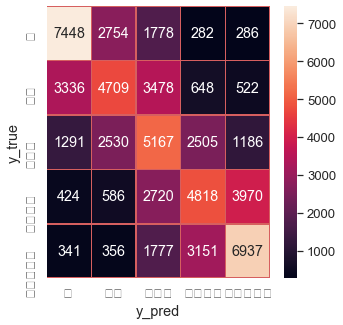

In [95]:
predictions = rf_gs.predict(X_test)
confusion(y_test,predictions)

In [96]:
report=pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).transpose() #otra manera de hacer
print("Reporte de Clasificación:")
report

Reporte de Clasificación:


,precision,recall,f1-score,support
1,0.580062,0.593561,0.586734,12548.000000
2,0.430636,0.370992,0.398595,12693.000000
3,0.346314,0.407524,0.374434,12679.000000
4,0.422483,0.384886,0.402809,12518.000000
5,0.537710,0.552221,0.544869,12562.000000
accuracy,0.461571,0.461571,0.461571,0.461571
macro avg,0.463441,0.461837,0.461488,63000.000000
weighted avg,0.463158,0.461571,0.461209,63000.000000


### ¿Qué información está usando el modelo para predecir?

In [97]:
tvc_pipe = Pipeline([

    ('tvec', CountVectorizer()),

    ('mb', MultinomialNB())
])


# Randomforest pipeline setup
rf_pipe = Pipeline([

    ('tvec', CountVectorizer()),

    ('rf', RandomForestClassifier())
])
# Fit
tvc_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)
# Setting params for TFIDF Vectorizer gridsearch
tf_params = {
    'tvec__max_features': [100, 2000],
    'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tvec__stop_words': [None, 'spanish'],

}
# Setting up randomforest params
rf_params = {
    'tvec__max_features': [2000],
    'tvec__ngram_range': [(1, 2)],
    'tvec__stop_words': [None, 'spanish'],
    'rf__max_depth': [1000],
    'rf__min_samples_split': [100],
    'rf__max_leaf_nodes': [None]
}

In [98]:
tvc_title = pd.DataFrame(rf_pipe.steps[1][1].feature_importances_,
                         tvc_pipe.steps[0][1].get_feature_names(), columns=['importance'])
tvc_title.sort_values('importance', ascending=False).head(20)


,importance
no,0.036970
perfecto,0.012249
muy,0.011933
mala,0.010088
pero,0.010017
buena,0.009758
bien,0.008755
buen,0.008462
de,0.008330
mal,0.007199


*Importancia*
¿Qué pasa con las palabras que usó para hacer esas predicciones? Cuando usamos un Pipeline, necesitamos 'entrar' en el estimador y desde allí podemos ver qué características (palabras) ha encontrado que son las más importantes al hacer predicciones. Usé esto para hacer una columna de marco de datos y ordenarla por la más importante.

In [99]:
#guardo las 20 palabrs de mayor importancia
tvc_title=tvc_title.sort_values('importance', ascending=False).head(20)

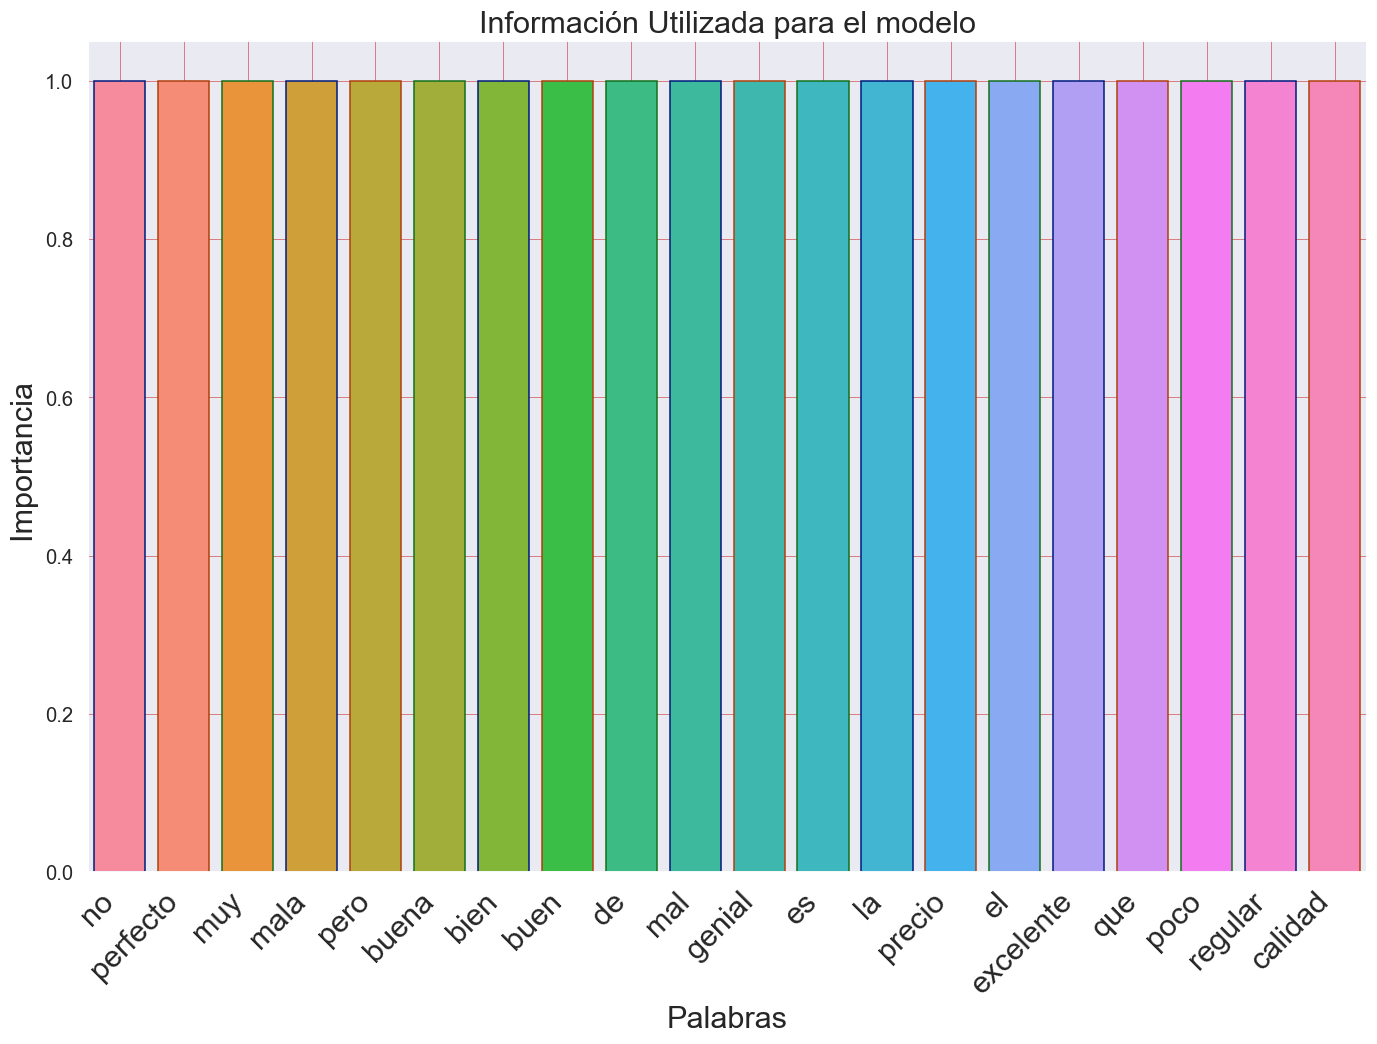

In [100]:
#Visualización de palabras más usadas para la predicción
plt.figure(figsize=(15,10),dpi= 110,facecolor='white',edgecolor='white',frameon=True)    # Cambio el tamaño para que sea legible
sns.set(context='notebook',style='darkgrid',palette='muted',font='sans-serif',font_scale=1.2)
ax = sns.countplot(x=tvc_title.index ,data=tvc_title,saturation=0.95,linewidth=1,edgecolor=sns.color_palette("dark", 3), dodge = False)
plt.title('Información Utilizada para el modelo',fontdict = {'fontsize': 20,'fontweight' :3, 'verticalalignment': 'baseline'})
plt.xlabel('Palabras' , fontsize=20)
plt.ylabel('Importancia ', fontsize=20)
plt.xticks(rotation=45 , ha='right', fontsize=20)

plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

### Conclusión
Luego de volver al procesamiento y haber probado varios modelos no eh logrado un buen score para el problema de multiclase. Voy a optar por tranformar el problema en una clasificación binaria para observar si existe modificación en el accuracy


# <font color=green> Machine Learnig -Conversión del problema multiclase a en un problema binario
Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica en lugar de predecir las estrellas, prediga esa etiqueta.

In [101]:
#copio el dataset3 para trabajar con clasificacion binaria
data_nuevo=dataset3.copy()

In [102]:
data_nuevo.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text length,text length2,titular_lemm,body_lemm,titular_stem,body_stem
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,nada bueno se me fue ka pantalla en menos de 8...,television nevir,es,electronics,94,16,television nevir,bueno ka pantalla menos 8 recibido respuesta f...,televis nevir,bueno ka pantalla meno mese recibido respuesta...
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"horrible, nos tuvimos que comprar otro porque ...",dinero tirado a la basura con esta compra,es,electronics,140,41,dinero tirado basura compra,horrible comprar sabemos inglés informático de...,dinero tirado basura compra,horribl comprar sabemo ingl s inform tico desp...
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117,53,solo llega unidad obligan comprar,obligan comprar do unidades llega solo forma r...,solo llega unidad obligan comprar,obligan comprar do unidad llega solo forma rec...
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"no entro en descalificar al vendedor, solo pue...",producto no recibido.,es,wireless,332,21,producto recibido,entro descalificar vendedor solo puedo decir t...,producto recibido,entro descalificar vendedor solo puedo decir t...
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,llega tarde y co la talla equivocada,devuelto,es,shoes,36,8,devuelto,llega tarde co talla equivocada,devuelto,llega tard co talla equivocada


In [103]:
#voy a pasar mi etiqueta a cero y uno donde 1 es positivo y 0 es negativo
data_nuevo.stars.replace([1,2,3,4,5], [0,0,0,1,1], inplace=True)

In [104]:
data_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210000 entries, 0 to 209999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         210000 non-null  object
 1   product_id        210000 non-null  object
 2   reviewer_id       210000 non-null  object
 3   stars             210000 non-null  int64 
 4   review_body       210000 non-null  object
 5   review_title      210000 non-null  object
 6   language          210000 non-null  object
 7   product_category  210000 non-null  object
 8   text length       210000 non-null  int64 
 9   text length2      210000 non-null  int64 
 10  titular_lemm      210000 non-null  object
 11  body_lemm         210000 non-null  object
 12  titular_stem      210000 non-null  object
 13  body_stem         210000 non-null  object
dtypes: int64(3), object(11)
memory usage: 22.4+ MB


In [105]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 50 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=50
#max(len(dataset3.titular_lemm)) 

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(binary=True,max_features=max_features) 

In [106]:
matriz_titulos = cou_vec.fit_transform(list_titulos)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['aceptable', 'baja', 'bastante', 'bien', 'bonita', 'bonito', 'buen', 'buena', 'bueno', 'calidad', 'caro', 'compra', 'comprar', 'correcto', 'cumple', 'demasiado', 'entrega', 'esperaba', 'excelente', 'funciona', 'función', 'funda', 'fácil', 'genial', 'gran', 'grande', 'gusta', 'llegado', 'llegó', 'mala', 'malo', 'mejor', 'pantalla', 'pequeño', 'perfecta', 'perfecto', 'poca', 'precio', 'producto', 'práctico', 'recomendable', 'recomiendo', 'regular', 'relación', 'roto', 'sirve', 'solo', 'tamaño', 'vale', 'útil']


**Feature y Target:
**Mezclado y División de los Datos* 30% para test y 70 % para train

In [107]:
x = matriz_titulos.toarray()
y = data_nuevo.stars

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

*Modelo Benchmark*

In [108]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
print("acc : ", nb.score(xtest,ytest))

acc :  0.707595238095238


Defino mis hiperparametros

In [109]:

tvc_pipe = Pipeline([
   
    ('tvec', CountVectorizer()),
    # ('tfidf', TfidfTransformer()),
    ('mb', MultinomialNB())
])


# Randomforest pipeline setup
rf_pipe = Pipeline([
   
    ('tvec', CountVectorizer()),
    # ('tfidf', TfidfTransformer()),
    ('rf', RandomForestClassifier())
])
# Fit
tvc_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)
# Setting params for TFIDF Vectorizer gridsearch
tf_params = {
    'tvec__max_features': [100, 2000],
    'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tvec__stop_words': [None, 'spanish'],

}
# Setting up randomforest params
rf_params = {
    'tvec__max_features': [2000],
    'tvec__ngram_range': [(1, 2)],
    'tvec__stop_words': [None,'spanish'],
    'rf__max_depth': [1000],
    'rf__min_samples_split': [100],
    'rf__max_leaf_nodes': [None]
}

**Feature y Target:
**Mezclado y División de los Datos* 30% para test y 70 % para train

In [110]:
X = data_nuevo['review_body']
y = data_nuevo['stars']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [111]:
# Setting up GridSearch for Randomforest
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1)
# Setting up GridSearch for TFIDFVectorizer
tvc_gs = GridSearchCV(tvc_pipe, param_grid=tf_params, cv = 5, verbose =1, n_jobs = -1)
# Fitting TVC GS
tvc_gs.fit(X_train, y_train)
# Fitting Randomforest CV GS
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  7.7min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [112]:
# Scoring Training data on TFIDFVectorizer
print(tvc_gs.score(X_train, y_train))

0.8157482993197279


In [113]:
# Scoring Test data on TFIDFVectorizer
print(tvc_gs.score(X_test, y_test))

0.811015873015873


In [114]:
# Scoring Training data on RandomForest
print(rf_gs.score(X_train, y_train))

0.9162653061224489


In [115]:
# Checking Test score on RandomForest
rf_gs.score(X_test, y_test)

0.829

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 11088 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 11088 missing from current font.
  font.set_text(s, 0, flags=flags)


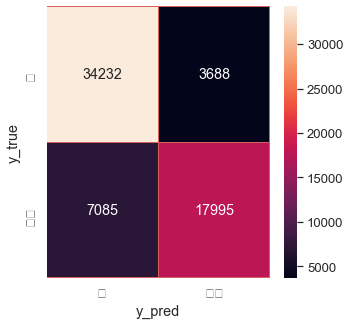

In [116]:
predictions = rf_gs.predict(X_test)
confusion(y_test,predictions)

In [117]:
report=pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).transpose() #otra manera de hacer
print("Reporte de Clasificación Binaria:")
report

Reporte de Clasificación Binaria:


,precision,recall,f1-score,support
0,0.828521,0.902743,0.864041,37920.000
1,0.829913,0.717504,0.769626,25080.000
accuracy,0.829000,0.829000,0.829000,0.829
macro avg,0.829217,0.810123,0.816833,63000.000
weighted avg,0.829075,0.829000,0.826455,63000.000


Ejemplo

In [118]:
X_=['el producto es genial']

In [119]:
predictions = rf_gs.predict(X_)

In [120]:
predictions

array([1], dtype=int64)

### Conclusión


Luego de ver el reporte de Clasificación Binaria pude observar que da mejores resultados, en caso que el usuario sólo necesite una calificacion positiva ó negativa el proyecto logró objetivo.  Pero si el cliente necesita si o sí saber a qué estrella pertenece la reseña de un producto se deberia abordar más en el prepocesamiento para lograr un mejor accuracy. 

# <font color=green> Análisis de Sentimientos
    con texblog

In [5]:
#copio mi conjunto de datos a dataSen
dataSen=dataset3.copy()


In [6]:
from textblob import TextBlob
#from bs4 import BeautifulSoup

In [9]:
# Se carga en listas las palabras normalizadas del campo titulo
titular_list = []

for titular in dataSen.review_title:  # probando con el cuerpo de reseñas
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    #titular = re.sub("[^a-zA-Z]", " ", str(titular)) #saque esta linea porque me sacaba los acentos y me cortaba las palabras

    # Pasamos todo a minúsculas
    titular = titular.lower()

    # Tokenizamos para separar las palabras
    #titular = nltk.word_tokenize(titular)
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)

    # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    titular = [wordnet_lemmatizer.lemmatize(
        w, get_wordnet_pos(w)) for w in titular]

    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]

    # Eliminamos las palabras d emenos de 3 letras
    titular = [palabra for palabra in titular if len(palabra) > 3]
    # Por ultimo volvemos a unir el titular
    titular = " ".join(titular)

    # dataset["titular_normalizado"] = titular_list
    titular_list.append(titular)

In [10]:
#agrega columna con el título normalizado

dataSen["titular_lemm"] = titular_list
#agrega columna con el título normalizado pero con nombre de titular_ingles para luego modificarlo y ponerlo en ingles
dataSen["titular_ingles"] = titular_list


In [13]:
#test="hola casa mañana"
#e=TextBlob("hola casa mañana")
#print(e.translate(to='en'))


In [29]:
#traducir = lambda x: TextBlob(x).translate(to="en")

In [33]:
#dataSen['tituloIngles'] = dataSen['titular_lemm'].apply(traducir)  
dataSen.head() 

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,titular_lemm,titular_ingles
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television nevir,television nevir
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,dinero tirado basura compra,dinero tirado basura compra
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega unidad obligan comprar,solo llega unidad obligan comprar
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,producto recibido,producto recibido
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,devuelto,devuelto


In [17]:
# def traduccion(texto):
#   return TextBlob(texto).translate(from_lang='es', to='en')


from textblob.exceptions import NotTranslated


def translate_comment(x):
    try:
        # Try to translate the string version of the comment
        return TextBlob(str(x)).translate(from_lang='es', to='en')
    except NotTranslated:
        # If the output is the same as the input just return the TextBlob version of the input
        return TextBlob(str(x))

In [18]:
from time import sleep
for i in range(len(dataSen['titular_ingles'])):
    # Translate one comment at a time
    dataSen['titular_ingles'].iloc[i] = translate_comment(
        dataSen['titular_ingles'].iloc[i])

    # Sleep for a quarter of second
    sleep(0.9)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


KeyboardInterrupt: 

In [45]:
dataSen.head(15)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,titular_lemm,titular_ingles
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television nevir,"(t, e, l, e, v, i, s, i, o, n, , n, e, v, i, r)"
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,dinero tirado basura compra,"(m, o, n, e, y, , t, h, r, o, w, n, , a, w, ..."
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega unidad obligan comprar,"(o, n, l, y, , u, n, i, t, , a, r, r, i, v, ..."
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,producto recibido,"(p, r, o, d, u, c, t, , r, e, c, e, i, v, e, d)"
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,devuelto,"(R, e, t, u, r, n, e, d)"
5,es_0779978,product_es_0103315,reviewer_es_0304973,1,Jamás me llegó y el vendedor nunca contacto co...,Jamás me llegó,es,home,jamás llegó,"(n, e, v, e, r, , c, a, m, e)"
6,es_0591840,product_es_0880915,reviewer_es_0642702,1,"El paraguas es de muy mala calidad,da la sensa...",Horroroso!!!,es,luggage,horroroso,"(h, o, r, r, i, f, y, i, n, g)"
7,es_0173297,product_es_0814677,reviewer_es_0895784,1,Tuve que devolverla porque al ser triangular n...,Poco funcional,es,office_product,funcional,"(f, u, n, c, t, i, o, n, a, l)"
8,es_0101300,product_es_0654228,reviewer_es_0789283,1,Estoy esperando despues de protestar varias ve...,No me llego,es,electronics,llego,"(I, , a, r, r, i, v, e)"
9,es_0487007,product_es_0877793,reviewer_es_0986278,1,"Defectuoso. En apariencia muy bien producto, p...","Mala calidad, defectuoso",es,kitchen,mala calidad defectuoso,"(p, o, o, r, , q, u, a, l, i, t, y, , d, e, ..."


In [ ]:
dataSen['tituloIngles'] = dataSen['titular_lemm'].apply(translate_comment)  
dataSen.head()  

In [15]:
dataSen['tituloIngles'] = dataSen['titular_lemm'].apply(traduccion)  
dataSen.head()  

KeyError: 'titular_lemm'

In [ ]:
titular_ingles = []

for i in dataSen.titular_lemm:
    blob = TextBlob(i)
    try:
        tra=blob.translate(from_lang='es', to='en')
        #print(blob.translate(from_lang='es', to='en'))
    except:
        tra="Same translation so skipping"
        #print("Same translation so skipping")
        
 # Por ultimo volvemos a unir el titular
    tra = " ".join(tra)

    # dataset["titular_normalizado"] = titular_list
    titular_ingles.append(tra)

In [ ]:
#agrega columna con el título normalizado
dataSen["titular_ingles"] = titular_list


In [144]:
def find_pol(review):  
    return TextBlob(review).sentiment.polarity


In [31]:
import requests


def tradu(text):

    url = 'http://translate.google.com/translate_a/t'

    params = {
        "text": text,
        "sl": "es",
        "tl": "en",
        "client": "p"
    }
    #a = print(requests.get(url, params=params).content)


    return requests.get(url, params=params).content

In [35]:
dataSen.tail()  


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,titular_lemm,titular_ingles
209995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,guadalupe,guadalupe
209996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,calidad precio,calidad precio
209997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,excelente,excelente
209998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,genial,genial
209999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,buena calidad,buena calidad


In [33]:
dataSen['titular_ingles'] = dataSen['titular_lemm'].apply(tradu)  
dataSen.head()  


KeyboardInterrupt: 

In [145]:
dataSen['Sentiment_Polarity'] = dataSen['review_title'].apply(find_pol)  
dataSen.head()  

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text length,text length2,titular_lemm,body_lemm,titular_stem,body_stem,Sentiment_Polarity
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,nada bueno se me fue ka pantalla en menos de 8...,television nevir,es,electronics,94,16,television nevir,bueno ka pantalla menos 8 recibido respuesta f...,televis nevir,bueno ka pantalla meno mese recibido respuesta...,0.0
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"horrible, nos tuvimos que comprar otro porque ...",dinero tirado a la basura con esta compra,es,electronics,140,41,dinero tirado basura compra,horrible comprar sabemos inglés informático de...,dinero tirado basura compra,horribl comprar sabemo ingl s inform tico desp...,0.0
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,117,53,solo llega unidad obligan comprar,obligan comprar do unidades llega solo forma r...,solo llega unidad obligan comprar,obligan comprar do unidad llega solo forma rec...,0.0
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"no entro en descalificar al vendedor, solo pue...",producto no recibido.,es,wireless,332,21,producto recibido,entro descalificar vendedor solo puedo decir t...,producto recibido,entro descalificar vendedor solo puedo decir t...,0.0
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,llega tarde y co la talla equivocada,devuelto,es,shoes,36,8,devuelto,llega tarde co talla equivocada,devuelto,llega tard co talla equivocada,0.0


In [11]:
dataSen['tituloIngles'] = dataSen['review_title'].apply(
    lambda x: TextBlob(x).translate(to = 'en'))


NotTranslated: Translation API returned the input string unchanged.

In [20]:
import requests
url = 'http://translate.google.com/translate_a/t'
params = {
    "text": "Simple is better than complex", 
    "sl": "en", 
    "tl": "es", 
    "client": "p"
}
print(requests.get(url, params=params).content)



b'"Mejor es simple que complejo"'


In [36]:
dataSen.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,titular_lemm,titular_ingles
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television nevir,"(t, e, l, e, v, i, s, i, o, n, , n, e, v, i, r)"
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,dinero tirado basura compra,"(m, o, n, e, y, , t, h, r, o, w, n, , a, w, ..."
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega unidad obligan comprar,"(o, n, l, y, , u, n, i, t, , a, r, r, i, v, ..."
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,producto recibido,"(p, r, o, d, u, c, t, , r, e, c, e, i, v, e, d)"
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,devuelto,"(R, e, t, u, r, n, e, d)"


In [38]:
#!pip install googletrans

  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15740 sha256=97a7b5e3efbb7bd1ec9d9d7a4e07d64005a601e1fb0742a3f0d44b4c52a733b1
  Stored in directory: c:\users\romil\appdata\local\pip\cache\wheels\20\da\eb\a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [55]:
from googletrans import Translator


translator = Translator()


def translate(text):
    try:
        if pd.notnull(text):
            return translator.translate(text).text
       # else:
        #    return text
    except Exception as e:
            return text

In [ ]:
dataSen['titulo_Ingles'] = dataSen['titular_lemm'].apply(translate) 


In [44]:
try:
    langs = translator.detect(update.message.text)
    if langs.lang == 'en':
        foo(translator.translate(update.message.text,dest='zh-cn').text)
    else:
        bar(translator.translate(update.message.text,dest='en').text)
except Exception as e:
    print(e)

name 'update' is not defined


In [43]:
#dataSen.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,titular_lemm,titular_ingles
209995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home,guadalupe,guadalupe
209996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera,calidad precio,calidad precio
209997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy,excelente,excelente
209998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless,genial,genial
209999,es_0810087,product_es_0684221,reviewer_es_0613091,5,El artículo ha cumplido con las expectativas q...,Buena calidad,es,apparel,buena calidad,buena calidad


# <font color=green> Utilización Redes neuronales convolucionales
    ¿Que pasaria entreno una red neuronal para un problema de multiclase?

El proyecto anterior se encuentra en: https://github.com/RomiLuna/proyecto4_DS con el nombre de RNC_para_NLP_proyecto 4